In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

%matplotlib inline

# Part 1: Prediction Result

In [2]:
pred = pd.read_csv('pred2/pred_accuracy.csv')
pred.head()

,location,Naive,Moving_Average,Expoential_Smoothing,SARIMA,LSTM,XGBoost,best,sig
0,5,660.733618,360.300285,423.488557,530.940868,284.342552,923.595662,LSTM,True
1,6,520.571453,327.748727,396.486996,407.171659,243.284027,1104.817177,LSTM,True
2,7,277.951764,179.614087,209.257630,226.013806,172.638283,394.805937,LSTM,False
3,31,511.515018,360.003204,328.671785,306.175995,227.402424,238.655428,LSTM,False
4,54,117.221866,116.518062,85.684484,86.202741,46.851449,79.381576,LSTM,True


### 1. Statistics of predictions

In [3]:
pred_res = pd.DataFrame(index = ('best_count', 'best_ratio', 'sig_count', 'sig_ratio'),
                        columns = ('Naive', 'Moving_Average', 'Expoential_Smoothing', 
                                   'SARIMA', 'LSTM', 'XGBoost', 'sum'))

In [4]:
pred_res.loc['best_count']['Naive'] = pred.loc[pred.best == 'Naive']['best'].count()
pred_res.loc['best_count']['Moving_Average'] = pred.loc[pred.best == 'avg']['best'].count()
pred_res.loc['best_count']['Expoential_Smoothing'] = pred.loc[pred.best == 'Holt_Winter']['best'].count()
pred_res.loc['best_count']['SARIMA'] = pred.loc[pred.best == 'SARIMA']['best'].count()
pred_res.loc['best_count']['LSTM'] = pred.loc[pred.best == 'LSTM']['best'].count()
pred_res.loc['best_count']['XGBoost'] = pred.loc[pred.best == 'XGBoost']['best'].count()
pred_res.loc['best_count']['sum'] = pred['best'].count()

pred_res.loc['best_ratio']['Naive'] = pred.loc[pred.best == 'Naive']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['Moving_Average'] = pred.loc[pred.best == 'avg']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['Expoential_Smoothing'] = pred.loc[pred.best == 'Holt_Winter']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['SARIMA'] = pred.loc[pred.best == 'SARIMA']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['LSTM'] = pred.loc[pred.best == 'LSTM']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['XGBoost'] = pred.loc[pred.best == 'XGBoost']['best'].count()/pred['best'].count()
pred_res.loc['best_ratio']['sum'] = 1

pred_res.loc['sig_count']['Naive'] = pred.loc[(pred.best == 'Naive') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['Moving_Average'] = pred.loc[(pred.best == 'avg') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['Expoential_Smoothing'] = pred.loc[(pred.best == 'Holt_Winter') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['SARIMA'] = pred.loc[(pred.best == 'SARIMA') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['LSTM'] = pred.loc[(pred.best == 'LSTM') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['XGBoost'] = pred.loc[(pred.best == 'XGBoost') & (pred.sig == True)]['best'].count()
pred_res.loc['sig_count']['sum'] = pred.loc[pred.sig == True]['best'].count()

pred_res.loc['sig_ratio']['Naive'] = pred.loc[(pred.best == 'Naive') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['Moving_Average'] = pred.loc[(pred.best == 'avg') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['Expoential_Smoothing'] = pred.loc[(pred.best == 'Holt_Winter') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['SARIMA'] = pred.loc[(pred.best == 'SARIMA') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['LSTM'] = pred.loc[(pred.best == 'LSTM') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['XGBoost'] = pred.loc[(pred.best == 'XGBoost') & (pred.sig == True)]['best'].count()/pred.loc[pred.sig == True]['sig'].count()
pred_res.loc['sig_ratio']['sum'] = 1

pred_res

,Naive,Moving_Average,Expoential_Smoothing,SARIMA,LSTM,XGBoost,sum
best_count,0,6,7,4,214,73,304
best_ratio,0.0,0.019737,0.023026,0.013158,0.703947,0.240132,1
sig_count,0,1,2,0,140,36,179
sig_ratio,0.0,0.005587,0.011173,0.000000,0.782123,0.201117,1


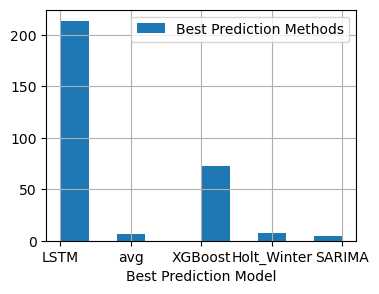

In [5]:
plt.style.use('default')

pred['best'].hist(label = 'Best Prediction Methods',figsize = (4,3))
#pred.loc[pred.sig == True]['best'].hist(label = 'Significant',figsize = (4,3))
plt.xlabel('Best Prediction Model')
plt.legend(loc = 'best')

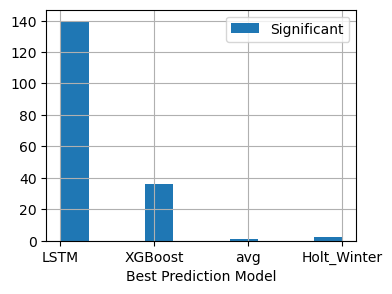

In [6]:
#pred['best'].hist(label = 'Best Prediction Methods',figsize = (4,3))
pred.loc[pred.sig == True]['best'].hist(label = 'Significant',figsize = (4,3))
plt.xlabel('Best Prediction Model')
plt.legend(loc = 'best')

### 2. Distributions of FF in Locations with Diff Best Models (satisfied significance)

In [7]:
ff = pd.read_csv('stackfootfall.csv')
ff = ff.drop(columns=['Unnamed: 0'])
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S')

In [8]:
ff = ff.loc[(ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-08-18 23:00')]

In [9]:
comp = pred[['location','best','sig']]

In [10]:
ff = pd.merge(ff, comp, how = 'inner', on = 'location')
ff.head()

,timestamp,location,device,footfall,year,month,day,hour,day_of_week,best,sig
0,2018-01-01 00:00:00,5.0,1780.0,494.0,2018,1,1,0,1,LSTM,True
1,2018-01-01 01:00:00,5.0,1780.0,899.0,2018,1,1,1,1,LSTM,True
2,2018-01-01 02:00:00,5.0,1780.0,770.0,2018,1,1,2,1,LSTM,True
3,2018-01-01 03:00:00,5.0,1780.0,599.0,2018,1,1,3,1,LSTM,True
4,2018-01-01 04:00:00,5.0,1780.0,331.0,2018,1,1,4,1,LSTM,True


Text(0.5, 0, 'Hour')

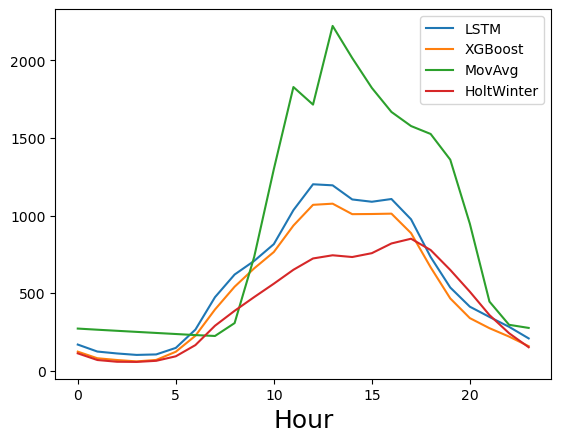

In [11]:
ff.loc[(ff.best == 'LSTM') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'LSTM')
ff.loc[(ff.best == 'XGBoost') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'XGBoost')
ff.loc[(ff.best == 'avg') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'MovAvg')
#ff.loc[(ff.best == 'SARIMA') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[(ff.best == 'Holt_Winter') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'HoltWinter')
#ff.loc[(ff.best == 'Naive') & (ff.sig == True)].groupby('hour')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')
plt.xlabel('Hour', fontsize=18)

Text(0.5, 0, 'Day of Week')

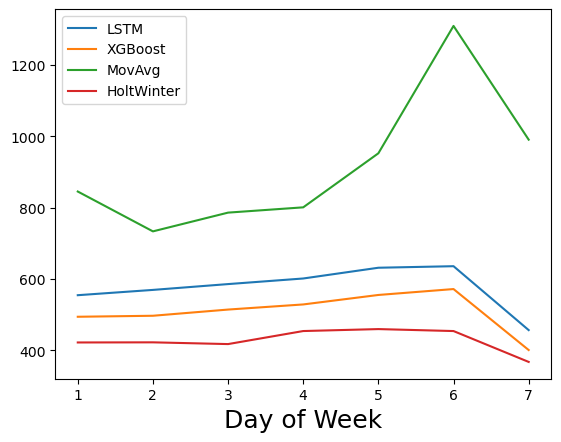

In [12]:
ff.loc[(ff.best == 'LSTM') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'LSTM')
ff.loc[(ff.best == 'XGBoost') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'XGBoost')
ff.loc[(ff.best == 'avg') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'MovAvg')
#ff.loc[(ff.best == 'SARIMA') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[(ff.best == 'Holt_Winter') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'HoltWinter')
#ff.loc[(ff.best == 'Naive') & (ff.sig == True)].groupby('day_of_week')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')
plt.xlabel('Day of Week', fontsize=18)

Text(0.5, 0, 'Month')

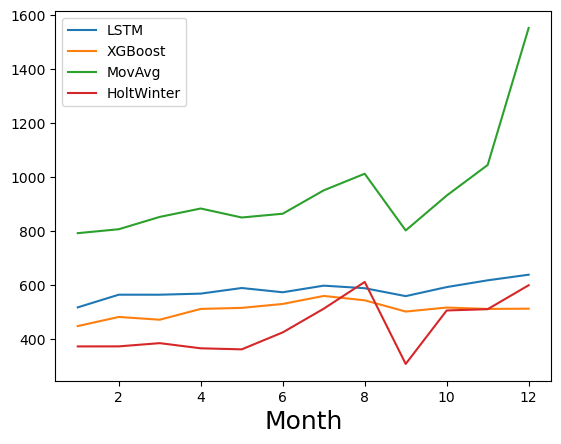

In [13]:
ff.loc[(ff.best == 'LSTM') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'LSTM')
ff.loc[(ff.best == 'XGBoost') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'XGBoost')
ff.loc[(ff.best == 'avg') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'MovAvg')
#ff.loc[(ff.best == 'SARIMA') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[(ff.best == 'Holt_Winter') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'HoltWinter')
#ff.loc[(ff.best == 'Naive') & (ff.sig == True)].groupby('month')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')
plt.xlabel('Month', fontsize=18)

In [14]:
ff_LSTM = ff.loc[(ff.best == 'LSTM') & (ff.sig == True)]
ff_XGBoost = ff.loc[(ff.best == 'XGBoost') & (ff.sig == True)]
ff_MovAvg = ff.loc[(ff.best == 'avg') & (ff.sig == True)]
ff_SARIMA = ff.loc[(ff.best == 'SARIMA') & (ff.sig == True)]
ff_HoltWinter = ff.loc[(ff.best == 'Holt_Winter') & (ff.sig == True)]
ff_Naive = ff.loc[(ff.best == 'Naive') & (ff.sig == True)]

ff_LSTMsum = ff_LSTM.groupby('timestamp')['footfall'].mean().to_frame()
ff_MovAvgsum = ff_MovAvg.groupby('timestamp')['footfall'].mean().to_frame()
ff_SARIMAsum = ff_SARIMA.groupby('timestamp')['footfall'].mean().to_frame()
ff_HoltWintersum = ff_HoltWinter.groupby('timestamp')['footfall'].mean().to_frame()
ff_Naivesum = ff_Naive.groupby('timestamp')['footfall'].mean().to_frame()
ff_XGBoostsum = ff_XGBoost.groupby('timestamp')['footfall'].mean().to_frame()

In [15]:
daily_LSTM = ff_LSTMsum.resample('D').mean()
weekly_LSTM = ff_LSTMsum.resample('W').mean()
monthly_LSTM = ff_LSTMsum.resample('M').mean()

daily_MovAvg = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg = ff_MovAvgsum.resample('M').mean()

daily_SARIMA = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter = ff_HoltWintersum.resample('M').mean()

daily_Naive = ff_Naivesum.resample('D').mean()
weekly_Naive = ff_Naivesum.resample('W').mean()
monthly_Naive = ff_Naivesum.resample('M').mean()

daily_XGBoost = ff_XGBoostsum.resample('D').mean()
weekly_XGBoost = ff_XGBoostsum.resample('W').mean()
monthly_XGBoost = ff_XGBoostsum.resample('M').mean()

In [16]:
daily_LSTM['LSTM'] = ff_LSTMsum.resample('D').mean()
weekly_LSTM['LSTM'] = ff_LSTMsum.resample('W').mean()
monthly_LSTM['LSTM'] = ff_LSTMsum.resample('M').mean()

daily_XGBoost['XGBoost'] = ff_XGBoostsum.resample('D').mean()
weekly_XGBoost['XGBoost'] = ff_XGBoostsum.resample('W').mean()
monthly_XGBoost['XGBoost'] = ff_XGBoostsum.resample('M').mean()

daily_MovAvg['MovAvg'] = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('M').mean()

daily_SARIMA['SARIMA'] = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('M').mean()

daily_Naive['Naive'] = ff_Naivesum.resample('D').mean()
weekly_Naive['Naive'] = ff_Naivesum.resample('W').mean()
monthly_Naive['Naive'] = ff_Naivesum.resample('M').mean()

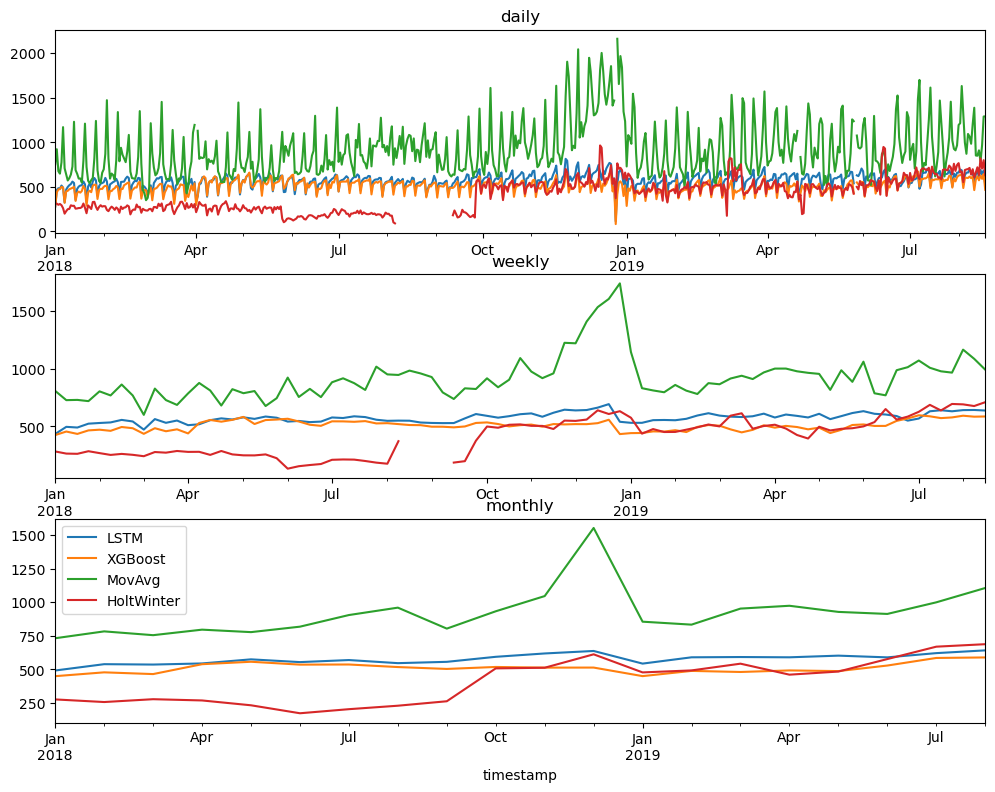

In [17]:
fig,axs = plt.subplots(3,1)

daily_LSTM['LSTM'].plot(figsize = (12,9),title = 'daily', label = 'LSTM', ax = axs[0])
daily_XGBoost['XGBoost'].plot(figsize = (12,9),title = 'daily', label = 'XGBoost', ax = axs[0])
daily_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'daily', label = 'MovAvg', ax = axs[0])
#daily_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'daily', label = 'SARIMA', ax = axs[0])
daily_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'daily', label = 'HoltWinter', ax = axs[0])
#daily_Naive['Naive'].plot(figsize = (12,9),title = 'daily', label = 'Naive', ax = axs[0])

weekly_LSTM['LSTM'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_XGBoost['XGBoost'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
#weekly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
#weekly_Naive['Naive'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])

monthly_LSTM['LSTM'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_XGBoost['XGBoost'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
#monthly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
#monthly_Naive['Naive'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])

plt.legend(loc = 'best')

# Part 2: Spatial Analysis

In [60]:
meta = pd.read_csv('meta/ff_locations.csv')

In [61]:
meta_loc = pd.merge(comp, meta, how = 'inner', on = 'location')
meta_loc

,location,best,sig,address,city,region,lat,lon,position,type
0,5,LSTM,True,"Unit 35, Hammersmith Broadway Shopping Centre,...",London,Greater London,51.49273,-0.22426,King Street entrance,External
1,6,LSTM,True,"Unit 11, Hammersmith Broadway Shopping Centre,...",London,Greater London,51.49215,-0.22356,Hammersmith Underground Station - Talgarth Roa...,External
2,7,LSTM,False,"Unit 13-16, Hammersmith Broadway Shopping Cent...",London,Greater London,51.49171,-0.22361,Talgarth Road entrance,External
3,31,LSTM,False,"Unit 3, Coppergate Shopping Centre, St. Marys ...",York,Yorkshire and the Humber,53.95737,-1.07965,Topshop,External
4,54,LSTM,True,"12 The Square, Market Harborough, LE16 7PA, Ea...",Market Harborough,East Midlands,52.47776,-0.92009,NaN,External
...,...,...,...,...,...,...,...,...,...,...
299,1165,LSTM,False,"40 West Street, Dorking, RH4 1BU, South East",Dorking,South East,51.23186,-0.33629,NaN,External
300,1119,LSTM,False,"26-28 The Moor, Sheffield, S1 4PA, Yorkshire a...",Sheffield,Yorkshire and the Humber,53.37705,-1.47288,NaN,External
301,1166,LSTM,False,"149-151 Victoria Street, London, SW1E 5NH, Gre...",London,Greater London,51.49683,-0.13995,NaN,External
302,1167,LSTM,False,"Unit LM08, Intu Victoria Centre, Victoria Cent...",Nottingham,East Midlands,52.95720,-1.14727,NaN,External


In [59]:
meta_loc.to_csv('pred2/loc_meta.csv')

### 1. Combine Roads

In [44]:
nearest_road = pd.read_csv('pred2/nearest_road.csv')[['location', 'best', 'sig', 'address', 'city', 'region',
       'position', 'NEAR_DIST', 'NEAR_FC']]

In [45]:
for i in range(len(nearest_road)):
    nearest_road['NEAR_FC'][i] = nearest_road['NEAR_FC'][i][14:]
    nearest_road['NEAR_DIST'][i] *= 1000
nearest_road.head()

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,best,sig,address,city,region,position,NEAR_DIST,NEAR_FC
0,5,LSTM,True,"Unit 35, Hammersmith Broadway Shopping Centre,...",London,Greater London,King Street entrance,0.249989,A_Road
1,6,LSTM,True,"Unit 11, Hammersmith Broadway Shopping Centre,...",London,Greater London,Hammersmith Underground Station - Talgarth Roa...,0.085263,Local_Road
2,7,LSTM,False,"Unit 13-16, Hammersmith Broadway Shopping Cent...",London,Greater London,Talgarth Road entrance,0.087891,A_Road
3,31,LSTM,False,"Unit 3, Coppergate Shopping Centre, St. Marys ...",York,Yorkshire and the Humber,Topshop,0.121614,Local_Road
4,54,LSTM,True,"12 The Square, Market Harborough, LE16 7PA, Ea...",Market Harborough,East Midlands,,0.182149,A_Road


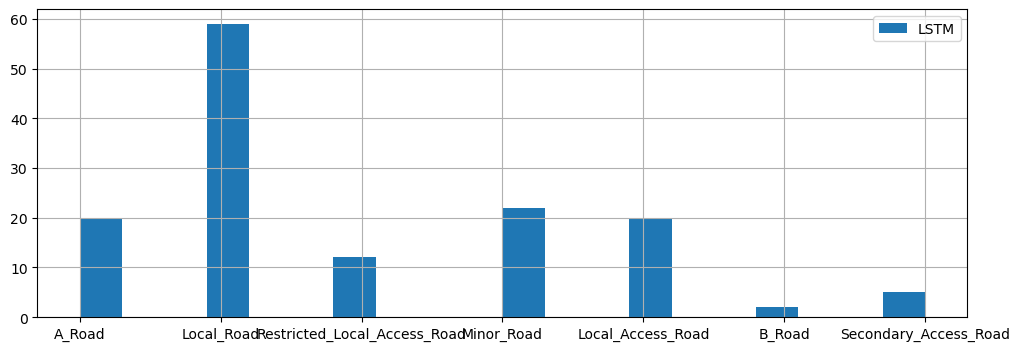

In [47]:
plt.figure(figsize = (12,4))
nearest_road.loc[(nearest_road.sig == True) & (nearest_road.best == 'LSTM')]['NEAR_FC'].hist(label = 'LSTM', bins = 20)

plt.legend(loc = 'best')

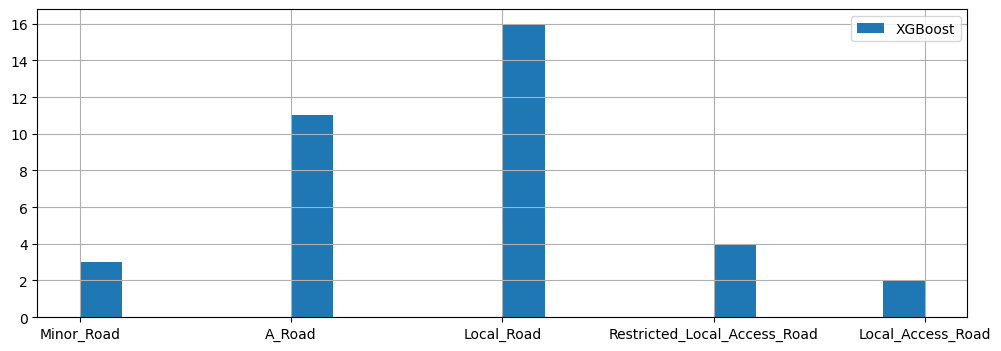

In [56]:
plt.figure(figsize = (12,4))
nearest_road.loc[(nearest_road.sig == True) & (nearest_road.best == 'XGBoost')]['NEAR_FC'].hist(label = 'XGBoost', bins = 20)

plt.legend(loc = 'best')

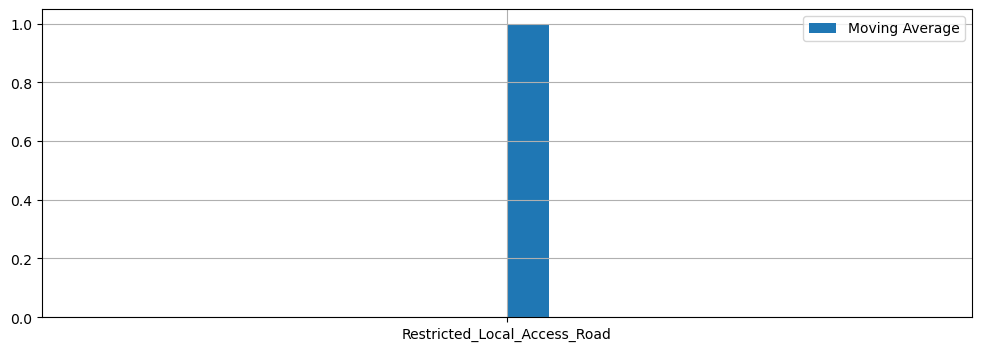

In [51]:
plt.figure(figsize = (12,4))
nearest_road.loc[(nearest_road.sig == True) & (nearest_road.best == 'avg')]['NEAR_FC'].hist(label = 'Moving Average', bins = 20)

plt.legend(loc = 'best')

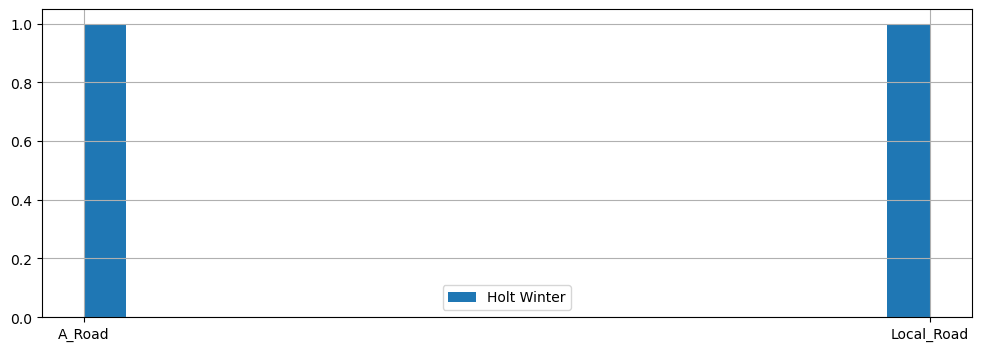

In [57]:
plt.figure(figsize = (12,4))
nearest_road.loc[(nearest_road.sig == True) & (nearest_road.best == 'Holt_Winter')]['NEAR_FC'].hist(label = 'Holt Winter', bins = 20)

plt.legend(loc = 'best')